In [1]:
# importing some useful modules
import numpy as np
%matplotlib inline
import matplotlib.pyplot as p

from IPython.core.magic import register_cell_magic
@register_cell_magic
def write_and_run(line, cell):
    argz = line.split()
    file = argz[-1]
    mode = 'w'
    with open(file, mode) as f:
        f.write(cell)
    get_ipython().run_cell(cell)



In [2]:
data = np.loadtxt("dataset_4_9_training.csv", delimiter=",")

# extracting the first column which contains the labels
data_labels = data[:, :1].reshape(data.shape[0],)
# extracting all the columns but the first which are our features
data_features = data[:, 1:]

In [3]:
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import time

# creating a dataframe using pandas only for the purpose fo plotting
df = pd.DataFrame({'Component 0':data_features[:,0], 'Component 1':data_features[:,1], 
                   'Component 2':data_features[:,2], 'label':data_labels})

fig = px.scatter_3d(df, x='Component 0', y='Component 1', z='Component 2', color='label')
fig.show()

In [4]:
### WRITE YOUR CODE BETWEEN THESE LINES - START
# Percentage of corpus considered for training
corp_perc = 80

# Calculating the total number of samples
corp_split = int(corp_perc * data.shape[0] // 100)

# Choosing random samples from data points corresponding to fours and nines
four_indices = np.random.choice(np.arange(data.shape[0]//2), corp_split//2, replace=False)
nine_indices = np.random.choice(np.arange(data.shape[0]//2, data.shape[0]), corp_split//2, replace=False)
my_data_four = np.copy(data[four_indices])
my_data_nine = np.copy(data[nine_indices])

# Forming data set with samples of fours and nines
my_data = np.concatenate((my_data_four, my_data_nine))

# Calculate the number of samples for testing (40%)
test_perc = 100 - corp_perc
semi_split = int(test_perc * my_data.shape[0] // 100)

# Creating training and testing input dictionaries
training_input = {'A': my_data_four[:-semi_split, 1:], 'B': my_data_nine[:-semi_split, 1:]}
test_input = {'A': my_data_four[-semi_split:, 1:], 'B': my_data_nine[-semi_split:, 1:]}
testing_input = np.concatenate((my_data_four[-semi_split:, 1:], my_data_nine[-semi_split:, 1:]))
testing_labels = np.concatenate((my_data_four[-semi_split:, :1], my_data_nine[-semi_split:, :1]))

# Prepare the training and testing datasets
x_train = np.concatenate((training_input['A'], training_input['B']))
y_train = np.concatenate((np.zeros(len(training_input['A'])), np.ones(len(training_input['B']))))
x_test = testing_input
y_test = np.concatenate((np.zeros(len(test_input['A'])), np.ones(len(test_input['B']))))
print(x_train,y_train,x_test,y_test)

[[0.89839935 1.0171895  0.67552149]
 [0.99900621 1.06632996 0.9170782 ]
 [0.97658378 1.01871371 0.88824546]
 ...
 [0.99050325 1.25228751 0.81049794]
 [0.90296221 1.11079085 0.86079335]
 [1.05777836 1.17097306 1.03614926]] [0. 0. 0. ... 1. 1. 1.] [[0.90848941 1.15884829 0.78330213]
 [1.13912809 1.21297359 0.79245639]
 [1.17249489 1.20517778 0.79081237]
 ...
 [1.15535498 0.64453834 0.93184614]
 [0.99569958 1.22827363 0.8171463 ]
 [0.94233459 1.11685169 0.92167485]] [0. 0. 0. ... 1. 1. 1.]


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import math
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix ,classification_report
from qiskit import *
from qiskit_ibm_provider import *
from qiskit_ibm_runtime import *
from qiskit_machine_learning.datasets import ad_hoc_data
from qiskit.circuit.library import TwoLocal
from qiskit_algorithms.optimizers import *
from qiskit.circuit.library import ZZFeatureMap
from qiskit.circuit.library import RealAmplitudes
from qiskit.primitives import Sampler
from qiskit_machine_learning.algorithms.classifiers import VQC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from qiskit.primitives import Sampler, Estimator
estimator = Estimator()
sampler = Sampler()
import pandas as pd
import seaborn as sns
import time
import psutil
from matplotlib import pyplot as plt
from IPython.display import clear_output
from qiskit.primitives import Sampler

In [ ]:
%%write_and_run feature_map.py
# The write_and_run function writes the content in this cell into the file "feature_map.py"

### WRITE YOUR CODE BETWEEN THESE LINES - START
import numpy as np
from qiskit import QuantumCircuit 
from qiskit.circuit import ParameterVector

def feature_map(num_qubits): 
    # Build the feature map
    reps = 3
    feature_map_circuit = QuantumCircuit(num_qubits)
    x = ParameterVector('x', length=num_qubits)

    for _ in range(reps):
        for i in range(num_qubits):
            feature_map_circuit.rx(x[i], i)
            feature_map_circuit.rz(x[i], i)
        feature_map_circuit.barrier()
        for control in range(num_qubits-1, 0, -1):
            target = control - 1
            feature_map_circuit.rx(x[target], target)
            feature_map_circuit.cx(control, target)
            feature_map_circuit.rx(x[target], target)
            feature_map_circuit.barrier()
        for i in range(num_qubits):
            feature_map_circuit.rx(x[i], i)
            feature_map_circuit.rz(x[i], i)
        feature_map_circuit.barrier()

    # Return both the circuit and the number of qubits
    return feature_map_circuit, num_qubits


In [ ]:

# Initialize the feature map
feature_map_circuit, num_qubits = feature_map(num_qubits=3)
feature_map_circuit.draw(output='mpl', style='clifford')

In [7]:
feature_map_circuit.depth()

22

In [8]:
%%write_and_run variational_circuit.py
# the write_and_run function writes the content in this cell into the file "variational_circuit.py"

### WRITE YOUR CODE BETWEEN THESE LINES - START
    
# import libraries that are used in the function below.
from qiskit import QuantumCircuit
from qiskit.circuit import ParameterVector
from qiskit.circuit.library import  RealAmplitudes, EfficientSU2, TwoLocal, NLocal
    
### WRITE YOUR CODE BETWEEN THESE LINES - END

def variational_circuit(num_qubits):
    # BUILD VARIATIONAL CIRCUIT HERE - START
    
    # import required qiskit libraries if additional libraries are required
    
    # build the variational circuit
    var_circuit = EfficientSU2(num_qubits, su2_gates=["rx", "y"], entanglement="linear", reps=2, insert_barriers=True) #EfficientSU2(num_qubits, entanglement='linear', reps=2, insert_barriers=True)
    #var_circuit = TwoLocal(num_qubits, ['ry', 'rz'], ['cx'], entanglement='linear', reps=4, insert_barriers=True)
    # BUILD VARIATIONAL CIRCUIT HERE - END
    
    # return the variational circuit which is either a VaritionalForm or QuantumCircuit object
    return var_circuit, num_qubits

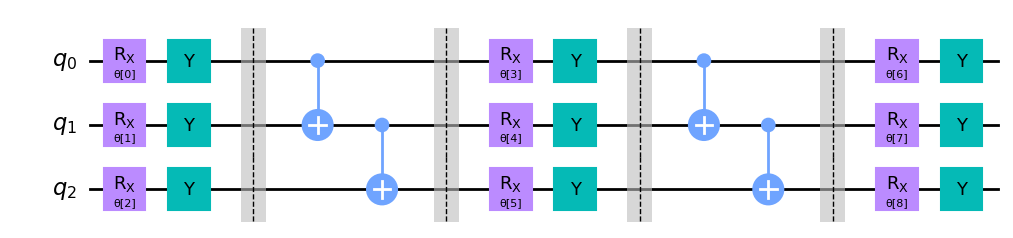

In [9]:
# Initialize the variational circuit
variational_circuit_circuit, num_qubits = variational_circuit(num_qubits=3)
variational_circuit_circuit.decompose().draw(output='mpl', style='clifford')

In [10]:
variational_circuit_circuit.decompose().depth()

10

In [11]:

cls_opt = COBYLA(maxiter=50, tol=0.001)

In [12]:
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)


def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals))
    , objective_func_vals)
    plt.show()

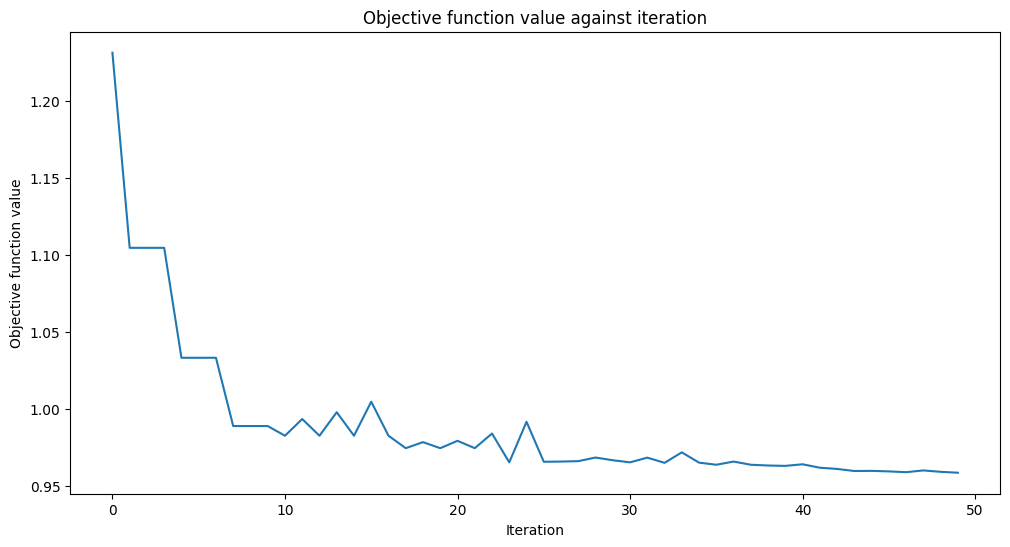

Training time: 198 seconds


In [13]:
import variational_circuit

# Initialize VQC with the derived number of qubits and the feature map
vqc = VQC(
    sampler = sampler,
    num_qubits = num_qubits,
    feature_map=feature_map_circuit,
    ansatz=variational_circuit_circuit,
    optimizer=cls_opt,
    callback=callback_graph,
    loss='cross_entropy',
)

# clear objective value history
objective_func_vals = []

start = time.time()
vqc.fit(x_train, y_train)
elapsed = time.time() - start
print(f"Training time: {round(elapsed)} seconds")

In [14]:
train_score_q2_ra = vqc.score(x_train, y_train)
test_score_q2_ra = vqc.score(x_test, y_test)

print(f"EstimatorQNN on the training dataset using TwoLocal: {train_score_q2_ra:.2f}")
print(f"EstimatorQNN on the test dataset using TwoLocal:     {test_score_q2_ra:.2f}")

EstimatorQNN on the training dataset using TwoLocal: 0.59
EstimatorQNN on the test dataset using TwoLocal:     0.60


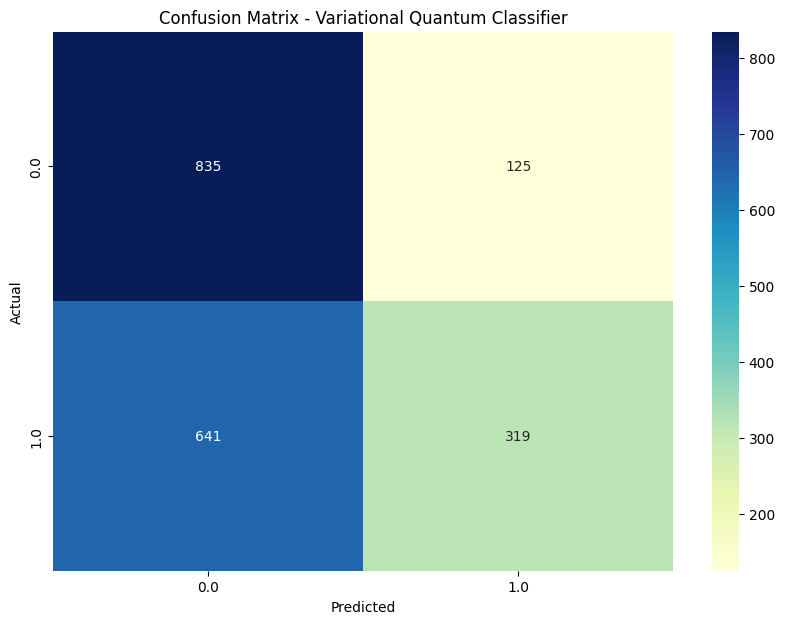

Accuracy = 60.10416666666667
F1 Score = 56.99830182588804


In [15]:
result = vqc.predict(x_test)

conf_mat = confusion_matrix(y_test, result)


# Use unique values of y_test as index and columns for the confusion matrix DataFrame
df_cm = pd.DataFrame(conf_mat, index=np.unique(y_test), columns=np.unique(y_test))

plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot=True, cmap="YlGnBu", fmt='g')
plt.title('Confusion Matrix - Variational Quantum Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

vqc_score = accuracy_score(y_test, result) * 100

print('Accuracy =', vqc_score)
print('F1 Score =', f1_score(y_test, result, average='weighted') *  100)
#evaluate_classifier(vqc)